# **Classification with CNN model on 'natural image' Dataset**

In [ ]:
! pip install kaggle

In [ ]:
import os
os.environ["KAGGLE_CONFIG_DIR"]="/content/kaggle.json"

In [ ]:
!kaggle datasets download -d prasunroy/natural-images

Dataset URL: https://www.kaggle.com/datasets/prasunroy/natural-images
License(s): CC-BY-NC-SA-4.0
 98% 336M/342M [00:05<00:00, 59.6MB/s]
100% 342M/342M [00:05<00:00, 60.1MB/s]


In [ ]:
!unzip /content/natural-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: natural_images/cat/cat_0204.jpg  
  inflating: natural_images/cat/cat_0205.jpg  
  inflating: natural_images/cat/cat_0206.jpg  
  inflating: natural_images/cat/cat_0207.jpg  
  inflating: natural_images/cat/cat_0208.jpg  
  inflating: natural_images/cat/cat_0209.jpg  
  inflating: natural_images/cat/cat_0210.jpg  
  inflating: natural_images/cat/cat_0211.jpg  
  inflating: natural_images/cat/cat_0212.jpg  
  inflating: natural_images/cat/cat_0213.jpg  
  inflating: natural_images/cat/cat_0214.jpg  
  inflating: natural_images/cat/cat_0215.jpg  
  inflating: natural_images/cat/cat_0216.jpg  
  inflating: natural_images/cat/cat_0217.jpg  
  inflating: natural_images/cat/cat_0218.jpg  
  inflating: natural_images/cat/cat_0219.jpg  
  inflating: natural_images/cat/cat_0220.jpg  
  inflating: natural_images/cat/cat_0221.jpg  
  inflating: natural_images/cat/cat_0222.jpg  
  inflating: natural_images/cat/cat_0223.jpg  
  inflati

## About Dataset
- This dataset contains 6,899 images
- and 8 distinct classes. The classes include
  1. airplane
  2. car
  3. cat
  4. dog
  5. flower
  6. fruit,
  7. motorbike
  8. person

## Importing libraries

In [ ]:
from IPython.display import Image, display

# preprocessing and processing
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# ploting
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from tensorflow.keras.utils import plot_model

# split data
from sklearn.model_selection import train_test_split

# CNN
from keras import models, layers

# val
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# plot all images
from pathlib import Path
import random
from PIL import Image

## Classes of Images in Dataset

In [ ]:
import os

labels = os.listdir('/content/natural_images')
print(labels)

['airplane', 'person', 'car', 'flower', 'motorbike', 'fruit', 'dog', 'cat']


# Some Random Images from Dataset

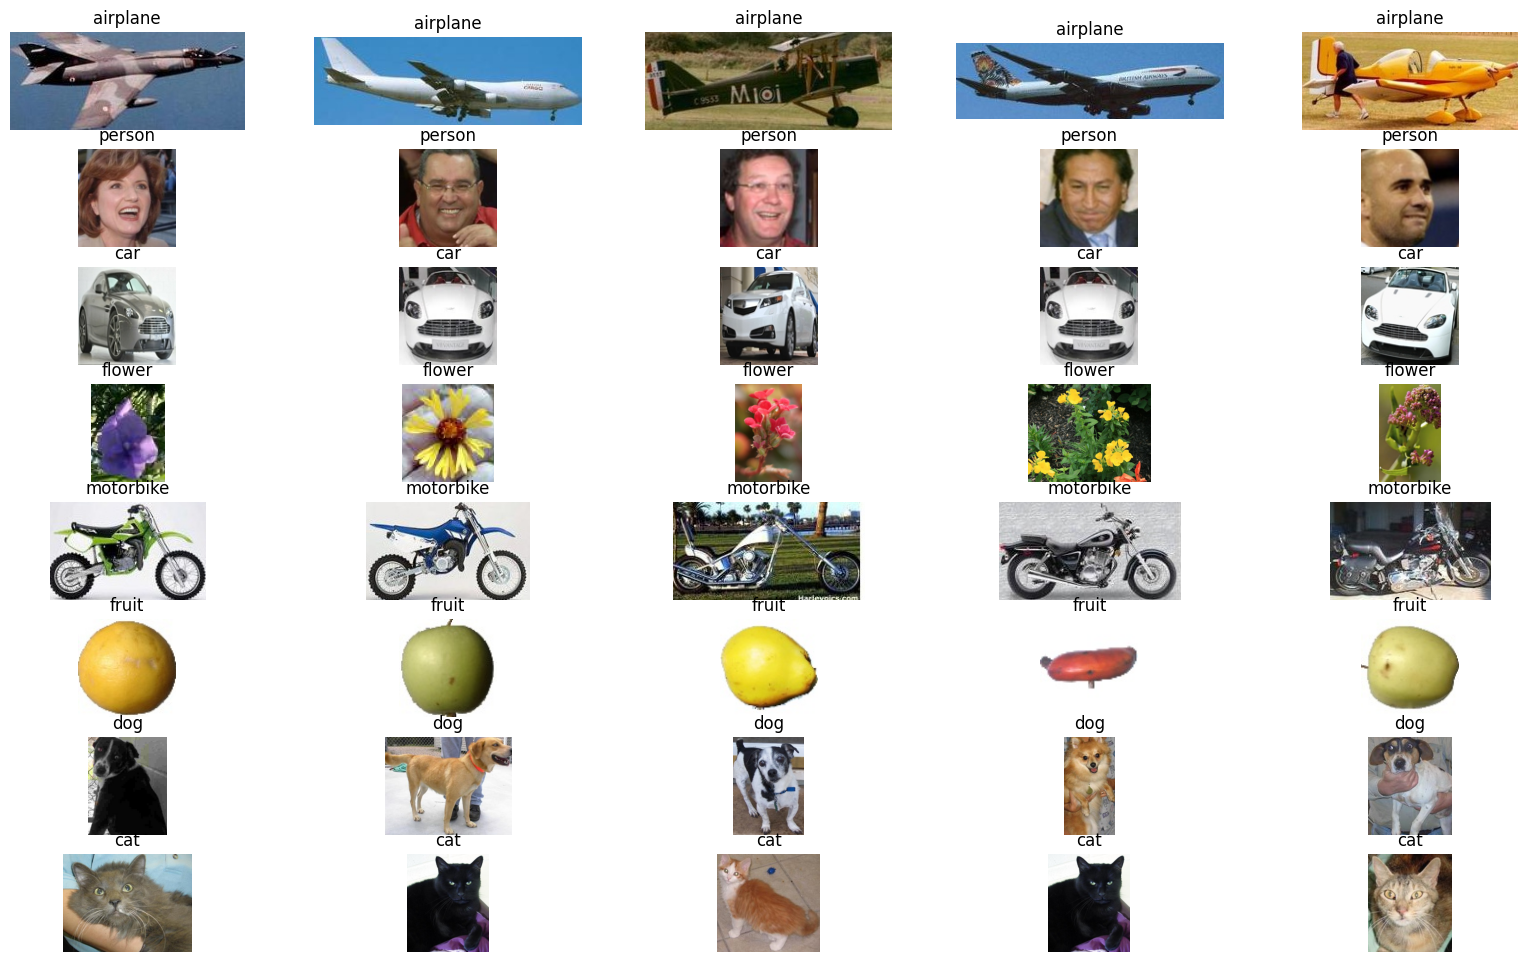

In [ ]:
labels = os.listdir('/content//data/natural_images/')
path = Path('/content//natural_images')

def displayRandomImagesFromEveryFolder(directory=path, samplesPerFolder=5):
    fig = plt.figure(figsize=(20,15))
    for rowIndex in range(1, 9):
        subdirectory = str(rowIndex)
        path = directory/labels[rowIndex -1]
        images = os.listdir(path)
        for sampleIndex in range(1,samplesPerFolder+1):
            randomNumber = random.randint(0, len(images)-1)
            image = Image.open(path/images[randomNumber])
            ax = fig.add_subplot(10, 5, samplesPerFolder*rowIndex + sampleIndex)
            ax.axis("off")

            plt.title(str(labels[rowIndex -1]))
            plt.imshow(image, cmap='gray')

    plt.show()

displayRandomImagesFromEveryFolder()

## Total Number of images in all Classes

In [ ]:
num = []
for label in labels:
    path = '/content/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    k = 0
    for image_path in folder_data:
        k = k+1
    num.append(k)

In [ ]:
fig = go.Figure(data=[go.Bar(
            x=labels, y=num,
            text=num,
            textposition='auto',
        )])
fig.update_layout(title_text='NUMBER OF IMAGES CONTAINED IN EACH CLASS')
fig.show()

## Stadardizing input data

In [ ]:
x_data =[]
y_data = []
import cv2
for label in labels:
    path = '/content/data/natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (120,120))
        x_data.append(np.array(image_resized))
        y_data.append(label)


x_data = np.array(x_data)
y_data = np.array(y_data)
print('the shape of X is: ', x_data.shape, 'and that of Y is: ', y_data.shape)
x_data = x_data.astype('float32')/255

the shape of X is:  (6899, 120, 120, 3) and that of Y is:  (6899,)


## converting y data into categorical data

In [ ]:
y_encoded = LabelEncoder().fit_transform(y_data)
y_categorical = to_categorical(y_encoded)

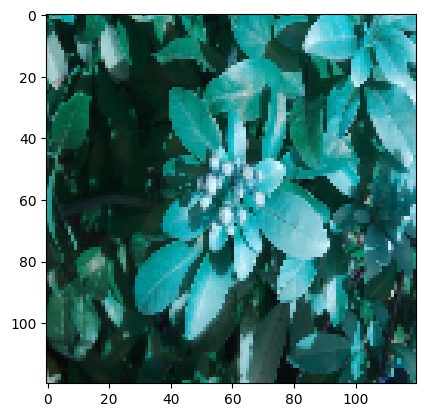

flower


In [ ]:
r = 2999
x = x_data[r]

plt.imshow(x)
plt.show()
print(y_data[r])

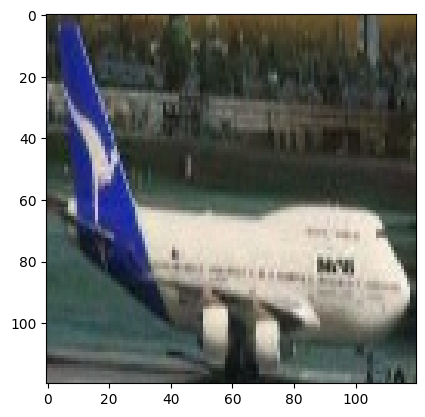

In [ ]:
x = x_data[0]

plt.imshow(x)
plt.show()


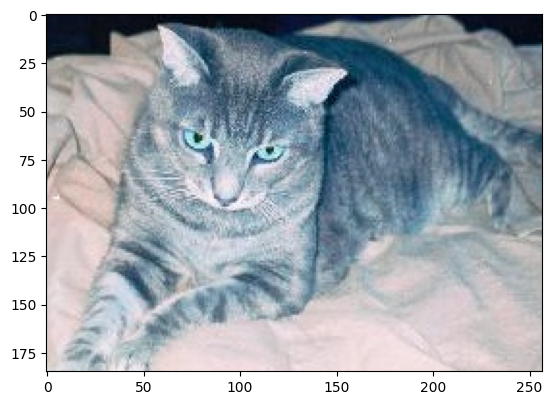

In [ ]:
zz = cv2.imread('/content/natural_images/cat/cat_0005.jpg')

plt.imshow(zz)
plt.show()

array([[[ 11,  15,  33],
        [ 11,  15,  33],
        [ 13,  17,  35],
        ...,
        [ 10,  14,  25],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[ 10,  14,  32],
        [ 10,  14,  32],
        [ 11,  15,  33],
        ...,
        [  9,  13,  24],
        [ 10,  14,  25],
        [  7,  13,  24]],

       [[  8,  15,  32],
        [  8,  15,  32],
        [  9,  16,  33],
        ...,
        [  7,  13,  24],
        [  9,  15,  26],
        [  8,  12,  23]],

       ...,

       [[224, 213, 209],
        [221, 212, 208],
        [217, 208, 205],
        ...,
        [196, 188, 188],
        [201, 193, 193],
        [198, 188, 188]],

       [[226, 216, 216],
        [223, 215, 215],
        [221, 213, 214],
        ...,
        [199, 191, 191],
        [208, 198, 198],
        [205, 193, 193]],

       [[228, 218, 224],
        [226, 219, 224],
        [221, 215, 220],
        ...,
        [204, 195, 192],
        [206, 197, 194],
        [206, 194, 192]]], dtype=uint8)
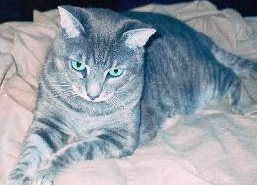

In [ ]:
zz

## shuffling data

In [ ]:
r = np.arange(x_data.shape[0])
np.random.seed(42)
np.random.shuffle(r)
X = x_data[r]
Y = y_categorical[r]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33)

## CNN model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(rate=0.25))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(rate=0.5))
model.add(layers.Dense(8, activation='softmax'))

## compiling the CNN model

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy'])

## Training the Model

In [ ]:
history = model.fit(X_train, Y_train, epochs=20, validation_split=0.2)

Epoch 1/20
116/116 [==============================] - 10s 38ms/step - loss: 1.1757 - accuracy: 0.6045 - val_loss: 0.4633 - val_accuracy: 0.8335
Epoch 2/20
116/116 [==============================] - 3s 23ms/step - loss: 0.4616 - accuracy: 0.8307 - val_loss: 0.3153 - val_accuracy: 0.8908
Epoch 3/20
116/116 [==============================] - 3s 24ms/step - loss: 0.3196 - accuracy: 0.8810 - val_loss: 0.3013 - val_accuracy: 0.8746
Epoch 4/20
116/116 [==============================] - 3s 24ms/step - loss: 0.2105 - accuracy: 0.9262 - val_loss: 0.2412 - val_accuracy: 0.9070
Epoch 5/20
116/116 [==============================] - 3s 27ms/step - loss: 0.1537 - accuracy: 0.9456 - val_loss: 0.2943 - val_accuracy: 0.9027
Epoch 6/20
116/116 [==============================] - 3s 25ms/step - loss: 0.1514 - accuracy: 0.9424 - val_loss: 0.2776 - val_accuracy: 0.9016
Epoch 7/20
116/116 [==============================] - 3s 24ms/step - loss: 0.0969 - accuracy: 0.9654 - val_loss: 0.4040 - val_accuracy: 0.885

## Ploting CNN model

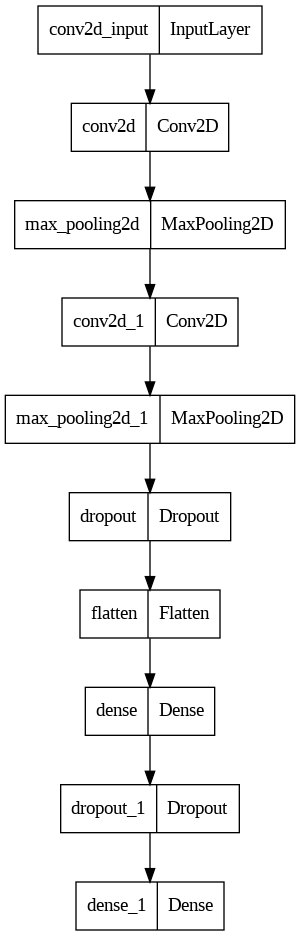

In [ ]:
plot_model(model)

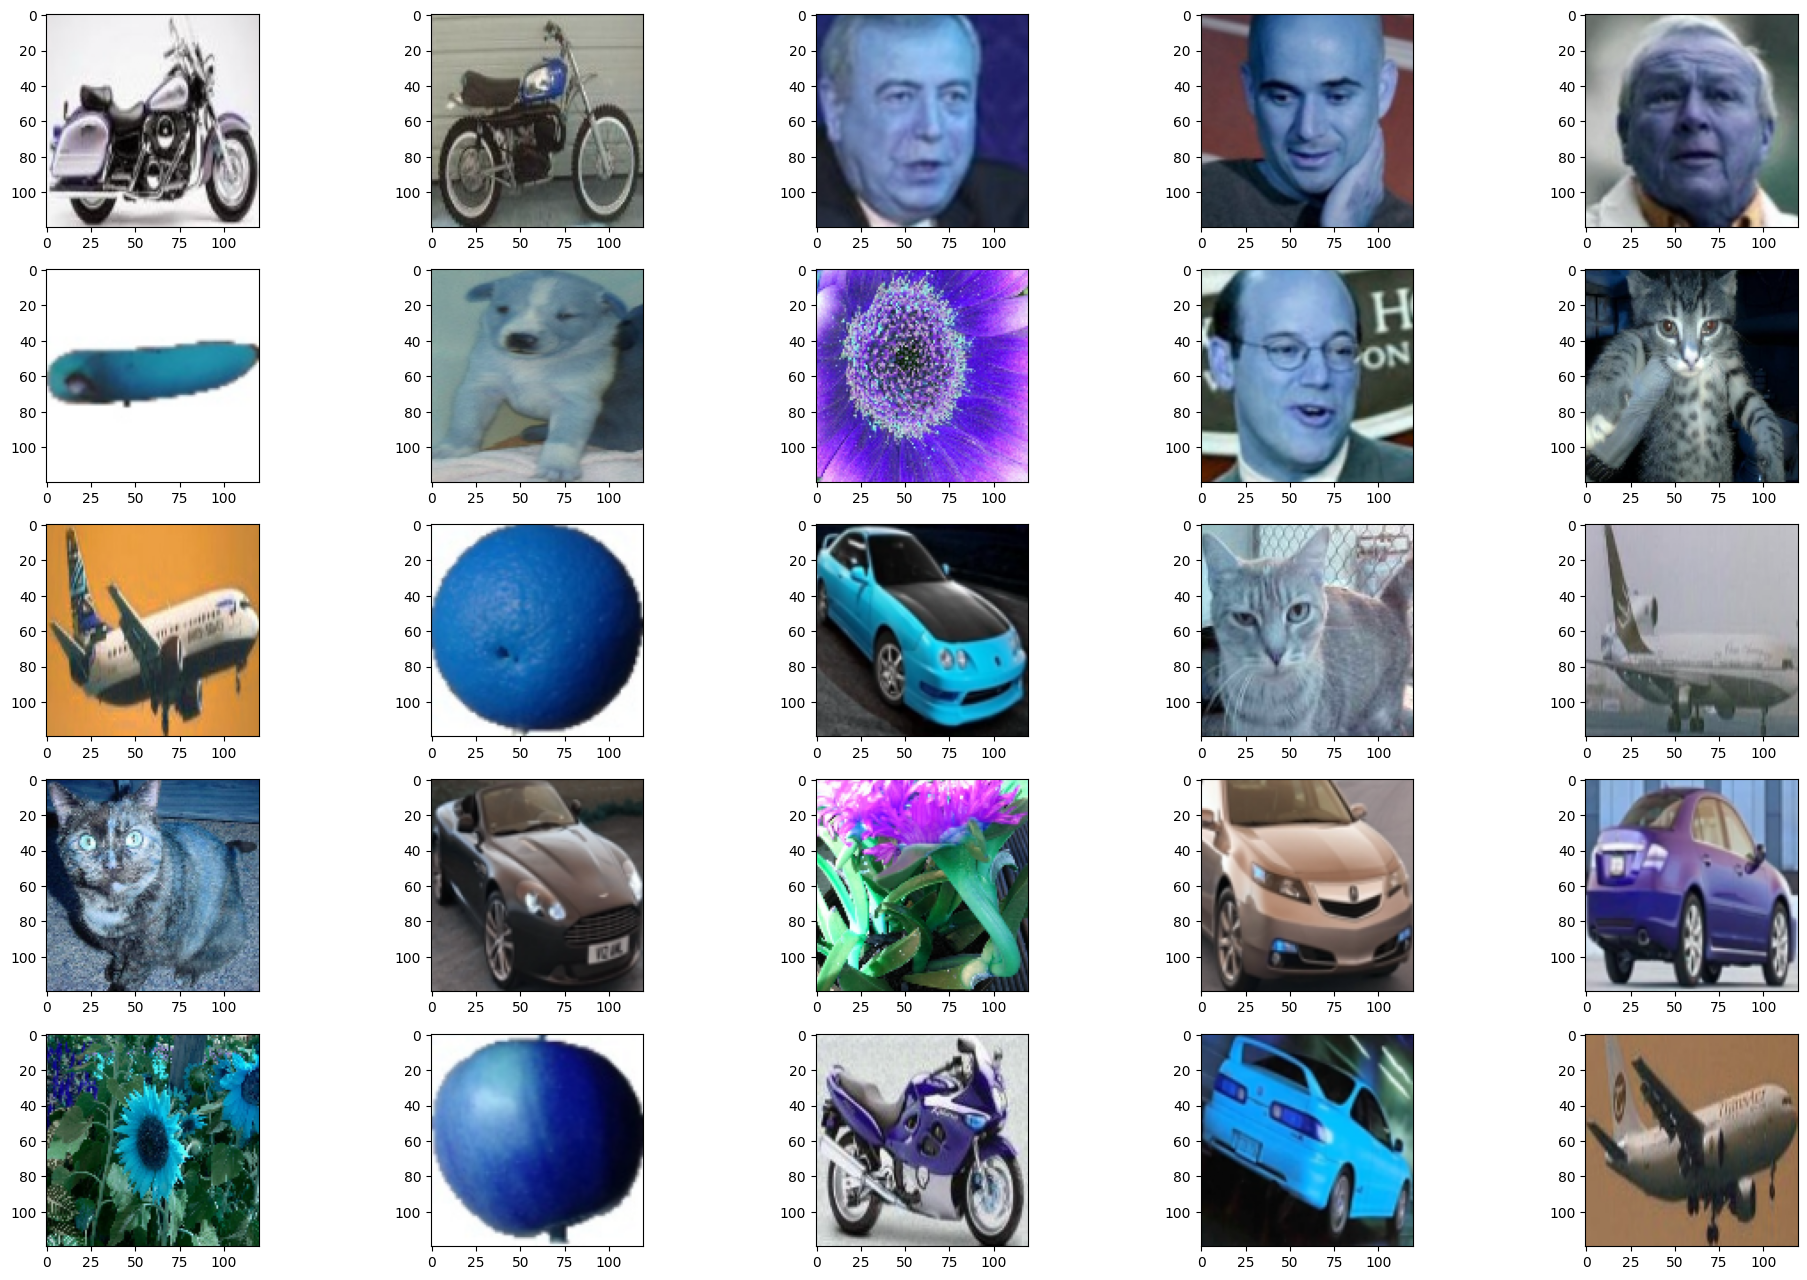

In [ ]:
fig = plt.figure(figsize=(24, 16))

for s in range(len(X_test[:25])):
    numberplt = s+1
    fig.add_subplot(5, 5, numberplt)
    plt.imshow(X_test[s])
    pass

## Accuracy Score

In [ ]:
Y_pred = np.argmax(model.predict(X_test), axis=1)
Y_test = np.argmax(Y_test, axis = 1)
print(Y_pred,'\n',Y_test)
accuracy_score(Y_pred,Y_test)

72/72 [==============================] - 1s 7ms/step
[6 6 7 ... 3 6 2] 
 [6 6 7 ... 3 6 2]


0.8897672375933245

In [ ]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.92      0.95       231
           1       0.88      0.95      0.91       349
           2       0.78      0.65      0.71       300
           3       0.67      0.62      0.64       223
           4       0.78      0.98      0.87       275
           5       0.99      1.00      0.99       333
           6       1.00      0.93      0.96       260
           7       1.00      0.99      0.99       306

    accuracy                           0.89      2277
   macro avg       0.89      0.88      0.88      2277
weighted avg       0.89      0.89      0.89      2277



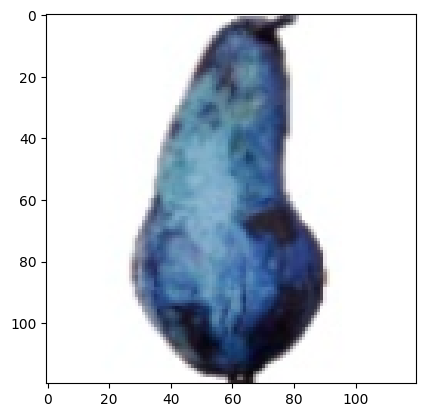

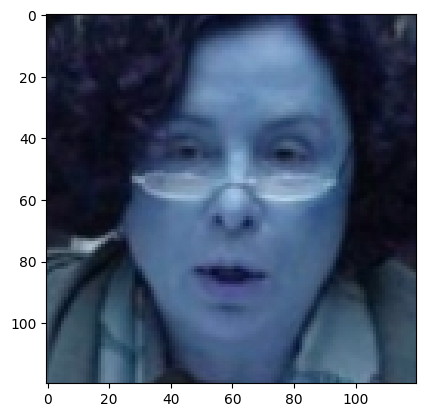

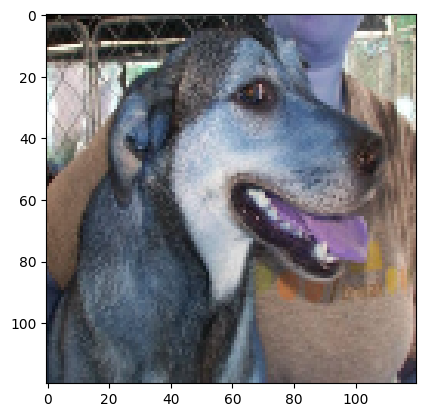

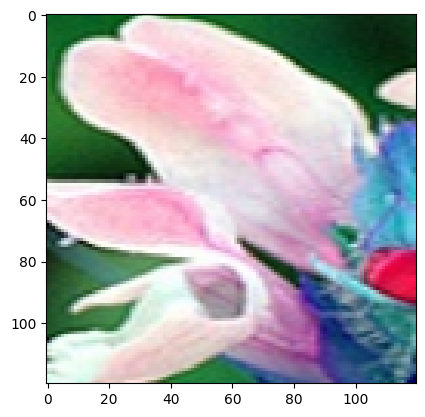

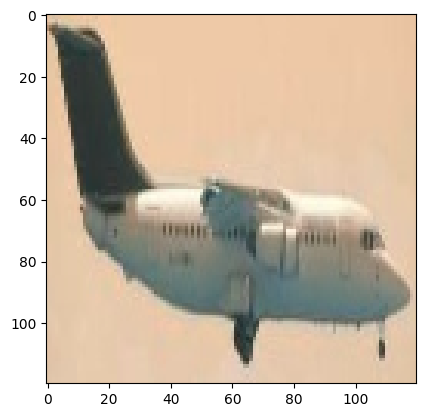

In [ ]:
z = X_test[116:121]
for i in z:
    plt.imshow(i)
    plt.show()

1/1 [==============================] - 0s 18ms/step


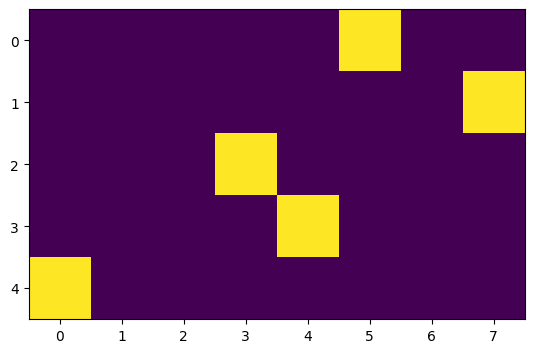

In [ ]:
x = model.predict(X_test[116:121])
plt.imshow(x)
plt.show()

In [ ]:
Y_pred[:20]

array([6, 6, 7, 7, 7, 5, 3, 4, 7, 3, 0, 5, 1, 2, 0, 2, 1, 4, 1, 1])

In [ ]:
Y_test[:20]

array([6, 6, 7, 7, 7, 5, 3, 4, 7, 2, 0, 5, 1, 2, 0, 2, 1, 4, 1, 1])